In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_24.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

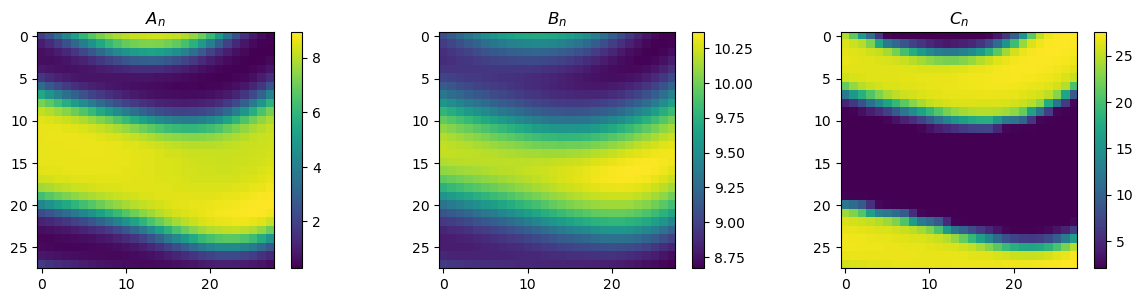

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(50,-50, 1)
y_slice = slice(50,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:32.604660, 
data A loss:6.031188, data B loss:9.371848, data C loss:17.201624, 
Laplacian A loss:88.281463, Laplacian B loss:7.600324
Physics loss:1.750050
Negative loss:0.134072

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=1.0000, V_B=1.0000, V_C=1.0000, mu_A=0.9000, mu_B=1.0999, K_AA=18.1179, K_AB=18.1179, K_AC=18.1179, K_BA=19.1306, K_BC=19.1306, K_CB=55.0787, K_CC=55.0787


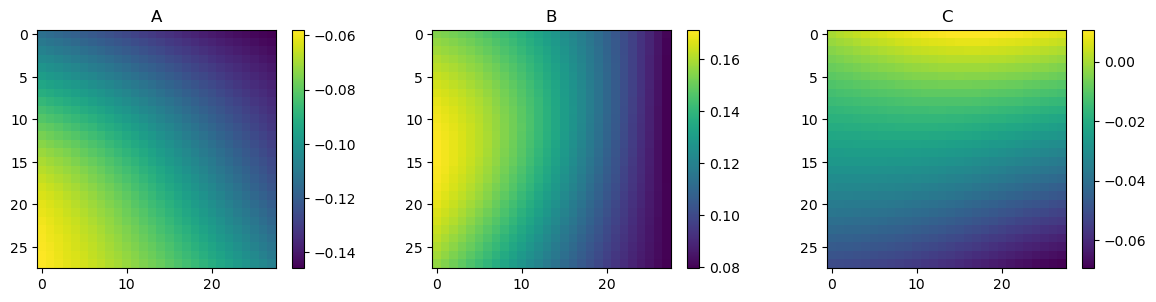

Epoch: 1000 
 data loss:14.267772, 
data A loss:2.636071, data B loss:0.533241, data C loss:11.098461, 
Laplacian A loss:39.227892, Laplacian B loss:7.621888
Physics loss:0.464668
Negative loss:0.398350

 b_A=-0.1379, b_B=1.1052, b_C=6.4291, V_A=5.8537, V_B=0.0000, V_C=7.6361, mu_A=0.4121, mu_B=0.1018, K_AA=6.2518, K_AB=19.0096, K_AC=18.3978, K_BA=19.2640, K_BC=19.4415, K_CB=55.0766, K_CC=52.8587


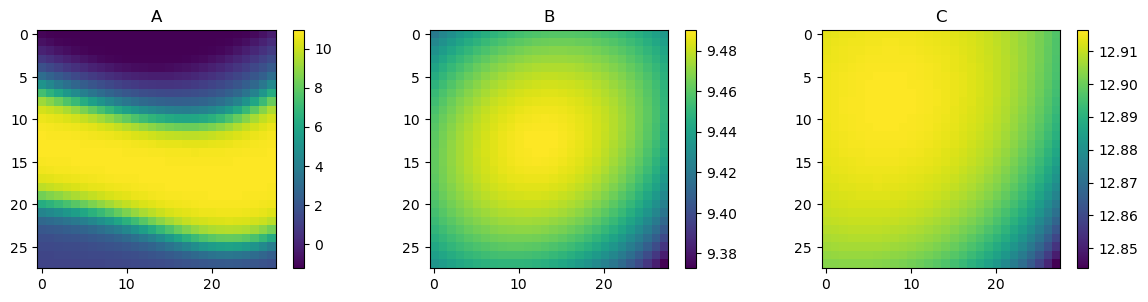

Epoch: 2000 
 data loss:7.983037, 
data A loss:1.452576, data B loss:0.533641, data C loss:5.996820, 
Laplacian A loss:9.663985, Laplacian B loss:7.616946
Physics loss:0.956957
Negative loss:0.891375

 b_A=-0.1235, b_B=1.1655, b_C=0.7769, V_A=2.4438, V_B=0.0092, V_C=12.0935, mu_A=0.0846, mu_B=0.1104, K_AA=4.5465, K_AB=19.2402, K_AC=36.2615, K_BA=10.0225, K_BC=12.7748, K_CB=55.0761, K_CC=10.5550


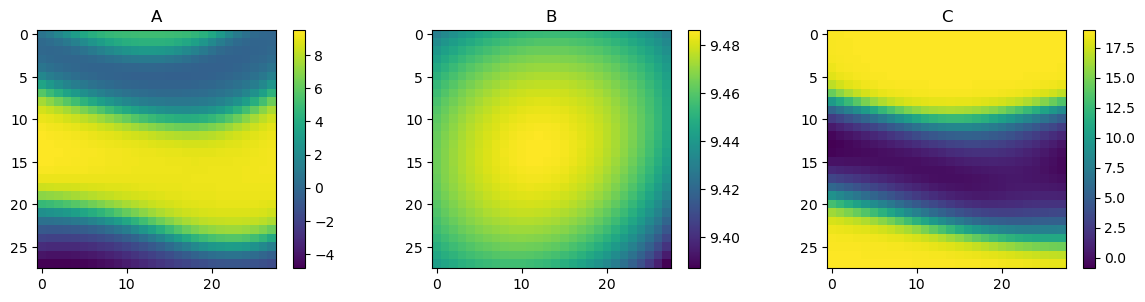

Epoch: 3000 
 data loss:5.723161, 
data A loss:0.808911, data B loss:0.533227, data C loss:4.381023, 
Laplacian A loss:3.649054, Laplacian B loss:7.613286
Physics loss:0.739448
Negative loss:0.455059

 b_A=-0.0765, b_B=1.2200, b_C=1.2648, V_A=6.9935, V_B=0.0968, V_C=14.1713, mu_A=0.5572, mu_B=0.1117, K_AA=4.7017, K_AB=19.4978, K_AC=36.1058, K_BA=13.8449, K_BC=13.6521, K_CB=55.0761, K_CC=13.4344


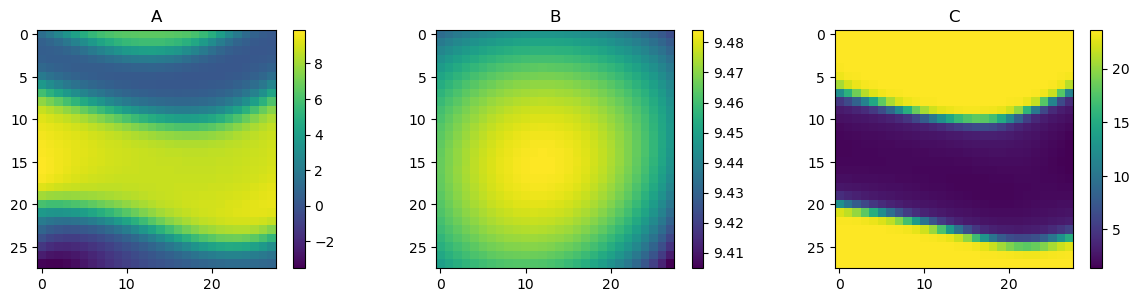

Epoch: 4000 
 data loss:5.043910, 
data A loss:0.270735, data B loss:0.414409, data C loss:4.358766, 
Laplacian A loss:0.986681, Laplacian B loss:5.968919
Physics loss:2.913446
Negative loss:0.066330

 b_A=-0.0252, b_B=-0.1640, b_C=1.2320, V_A=10.6500, V_B=7.3595, V_C=12.1000, mu_A=0.8943, mu_B=0.3291, K_AA=4.6664, K_AB=5.9313, K_AC=35.3326, K_BA=14.1445, K_BC=19.7519, K_CB=25.8547, K_CC=13.4148


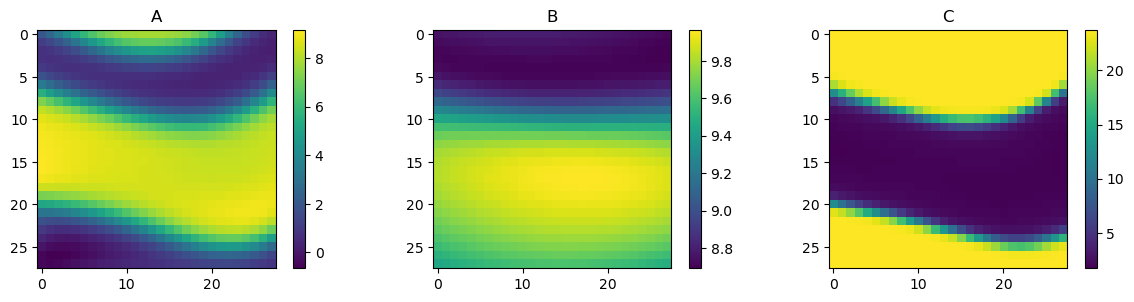

Epoch: 5000 
 data loss:4.545430, 
data A loss:0.147146, data B loss:0.048879, data C loss:4.349406, 
Laplacian A loss:0.607636, Laplacian B loss:1.061627
Physics loss:1.358256
Negative loss:0.004665

 b_A=-0.0266, b_B=-0.0183, b_C=1.2097, V_A=15.5598, V_B=27.2238, V_C=12.5767, mu_A=0.8579, mu_B=1.0170, K_AA=4.9767, K_AB=7.3220, K_AC=36.2693, K_BA=10.5609, K_BC=16.6671, K_CB=43.3875, K_CC=13.3414


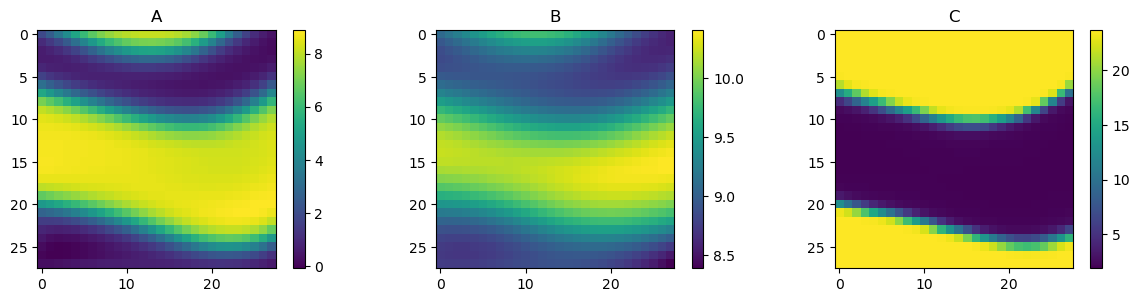

Epoch: 6000 
 data loss:4.481911, 
data A loss:0.099328, data B loss:0.037008, data C loss:4.345575, 
Laplacian A loss:0.573197, Laplacian B loss:0.689133
Physics loss:1.295951
Negative loss:0.000000

 b_A=-0.0312, b_B=-0.0042, b_C=1.1935, V_A=16.3407, V_B=28.2877, V_C=12.6219, mu_A=0.8526, mu_B=1.0050, K_AA=4.9949, K_AB=7.4728, K_AC=36.2693, K_BA=10.2872, K_BC=16.4422, K_CB=48.0295, K_CC=13.3081


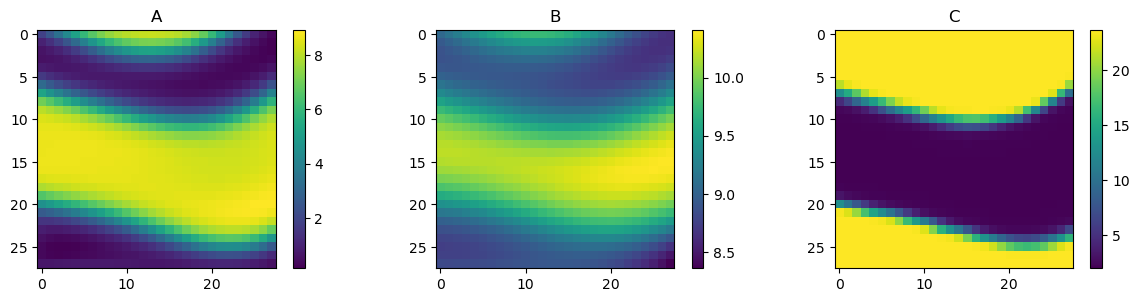

Epoch: 7000 
 data loss:4.447910, 
data A loss:0.076823, data B loss:0.027785, data C loss:4.343302, 
Laplacian A loss:0.368168, Laplacian B loss:0.428981
Physics loss:1.320721
Negative loss:0.000000

 b_A=-0.0431, b_B=-0.0131, b_C=1.1943, V_A=16.4598, V_B=28.5197, V_C=12.7524, mu_A=0.8557, mu_B=1.0066, K_AA=4.9999, K_AB=7.5370, K_AC=36.2706, K_BA=10.2376, K_BC=15.9131, K_CB=51.1104, K_CC=13.2293


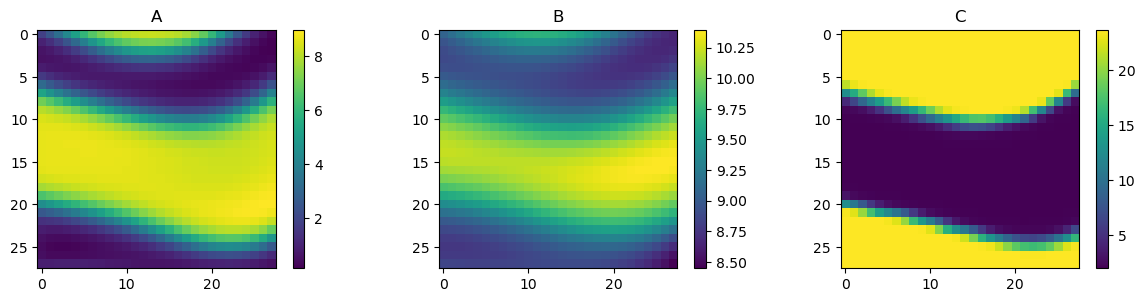

Epoch: 8000 
 data loss:4.422509, 
data A loss:0.062971, data B loss:0.018568, data C loss:4.340970, 
Laplacian A loss:0.299228, Laplacian B loss:0.392156
Physics loss:1.327854
Negative loss:0.000000

 b_A=-0.0580, b_B=-0.0255, b_C=1.1862, V_A=16.6572, V_B=28.5223, V_C=12.7861, mu_A=0.8555, mu_B=1.0115, K_AA=5.0048, K_AB=7.5381, K_AC=36.2707, K_BA=10.1666, K_BC=15.7317, K_CB=49.5256, K_CC=13.1963


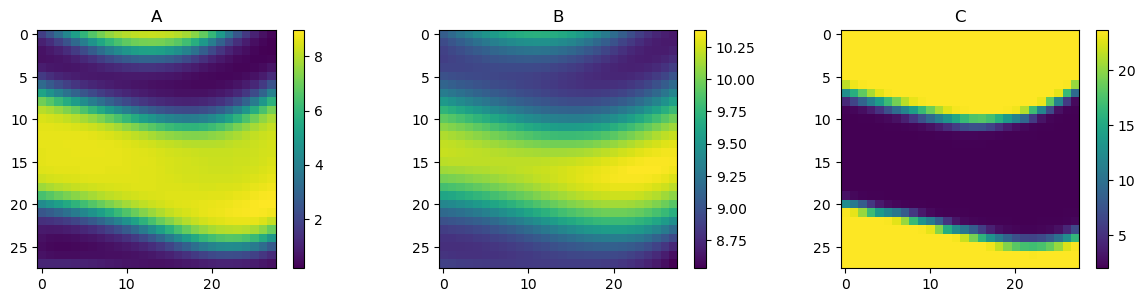

Epoch: 9000 
 data loss:0.507003, 
data A loss:0.054283, data B loss:0.012461, data C loss:0.440259, 
Laplacian A loss:0.296902, Laplacian B loss:0.356625
Physics loss:0.991343
Negative loss:0.000000

 b_A=-0.0694, b_B=-0.0260, b_C=1.2495, V_A=16.7842, V_B=19.6367, V_C=20.6349, mu_A=0.8564, mu_B=0.9645, K_AA=5.0071, K_AB=5.3432, K_AC=36.2464, K_BA=10.1258, K_BC=10.0254, K_CB=8.2334, K_CC=14.1192


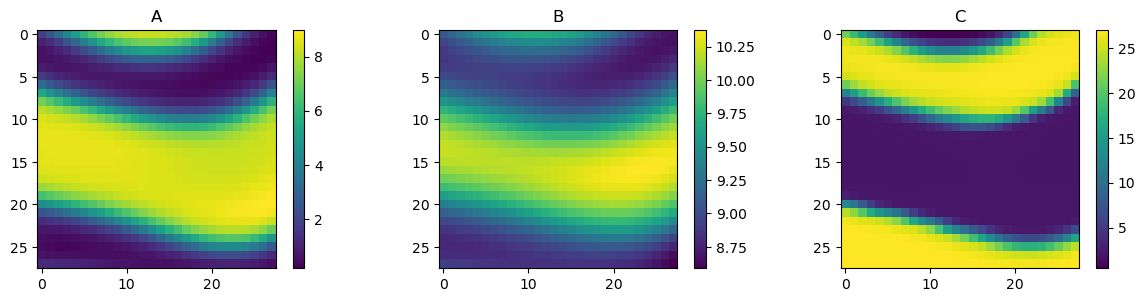

Epoch: 10000 
 data loss:0.295254, 
data A loss:0.049911, data B loss:0.008135, data C loss:0.237208, 
Laplacian A loss:0.501342, Laplacian B loss:0.337349
Physics loss:0.963969
Negative loss:0.000000

 b_A=-0.0750, b_B=-0.0267, b_C=1.2483, V_A=16.8374, V_B=19.5594, V_C=30.3665, mu_A=0.8559, mu_B=0.9643, K_AA=5.0072, K_AB=5.2982, K_AC=35.4453, K_BA=10.1109, K_BC=8.1757, K_CB=8.1142, K_CC=13.6393


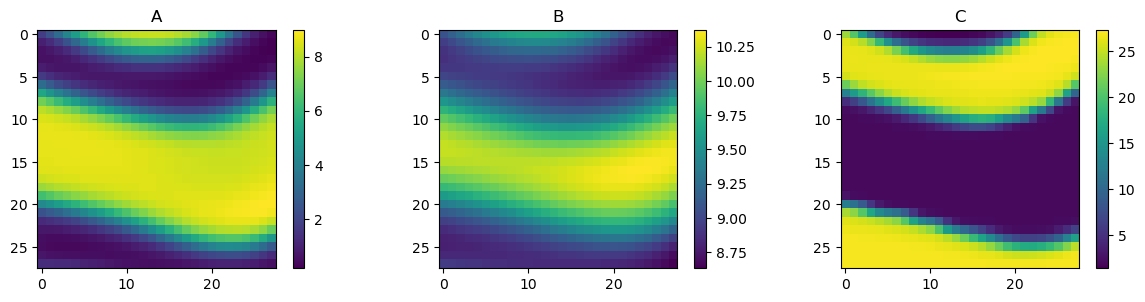

Epoch: 11000 
 data loss:0.246644, 
data A loss:0.046060, data B loss:0.006529, data C loss:0.194055, 
Laplacian A loss:0.189414, Laplacian B loss:0.325327
Physics loss:0.968097
Negative loss:0.000000

 b_A=-0.0793, b_B=-0.0280, b_C=1.2421, V_A=16.8564, V_B=19.5371, V_C=34.6752, mu_A=0.8581, mu_B=0.9662, K_AA=5.0093, K_AB=5.2829, K_AC=33.0123, K_BA=10.1026, K_BC=7.7338, K_CB=8.0674, K_CC=13.5220


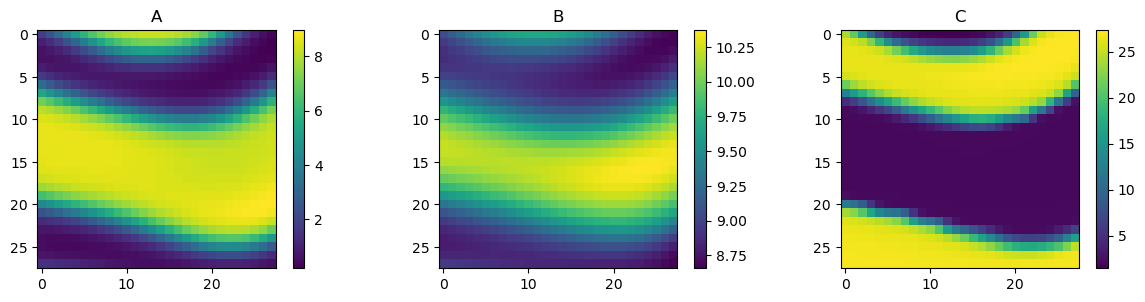

Epoch: 12000 
 data loss:0.213797, 
data A loss:0.044376, data B loss:0.005885, data C loss:0.163535, 
Laplacian A loss:0.173496, Laplacian B loss:0.316877
Physics loss:0.973848
Negative loss:0.000000

 b_A=-0.0792, b_B=-0.0255, b_C=1.2425, V_A=16.8799, V_B=19.5481, V_C=37.6605, mu_A=0.8560, mu_B=0.9641, K_AA=5.0073, K_AB=5.2819, K_AC=27.9444, K_BA=10.0997, K_BC=7.4932, K_CB=8.0749, K_CC=13.4618


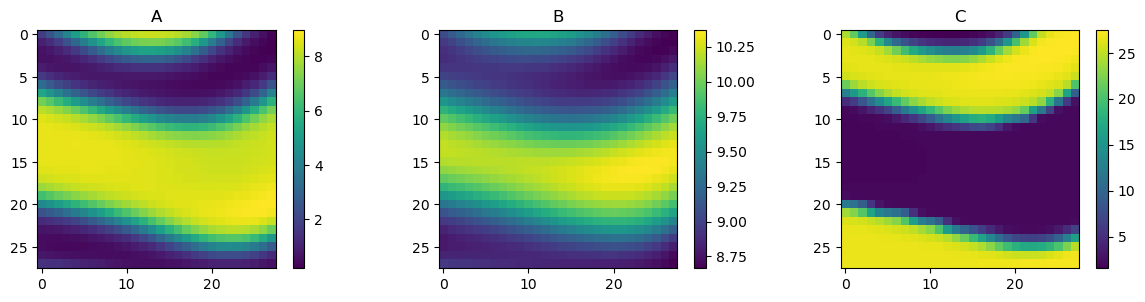

Epoch: 13000 
 data loss:0.197641, 
data A loss:0.043401, data B loss:0.005615, data C loss:0.148625, 
Laplacian A loss:0.161502, Laplacian B loss:0.307529
Physics loss:0.939265
Negative loss:0.000000

 b_A=-0.0794, b_B=-0.0258, b_C=1.1230, V_A=16.8793, V_B=19.5661, V_C=39.6787, mu_A=0.8570, mu_B=0.9651, K_AA=5.0079, K_AB=5.2896, K_AC=5.1832, K_BA=10.0997, K_BC=7.2427, K_CB=8.0881, K_CC=7.0921


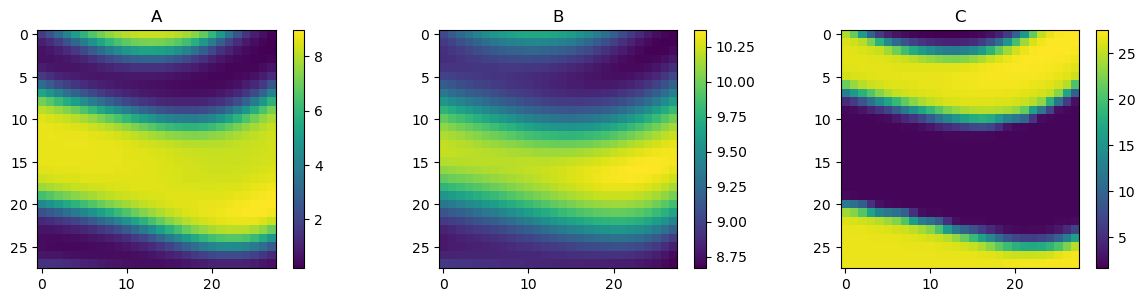

Epoch: 14000 
 data loss:0.183957, 
data A loss:0.042787, data B loss:0.005376, data C loss:0.135794, 
Laplacian A loss:0.152498, Laplacian B loss:0.233569
Physics loss:0.959523
Negative loss:0.000000

 b_A=-0.0770, b_B=-0.0184, b_C=1.1284, V_A=16.8884, V_B=19.5124, V_C=41.1863, mu_A=0.8542, mu_B=0.9606, K_AA=5.0055, K_AB=5.2621, K_AC=5.2044, K_BA=10.0998, K_BC=7.1508, K_CB=8.0497, K_CC=7.1410


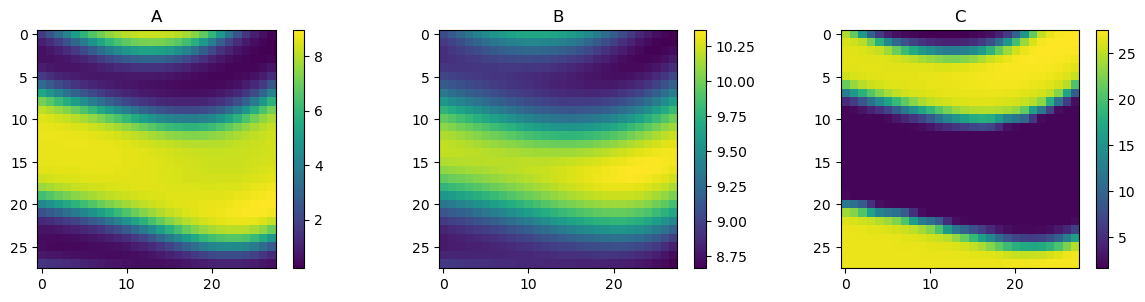

Epoch: 15000 
 data loss:0.162200, 
data A loss:0.042296, data B loss:0.004522, data C loss:0.115382, 
Laplacian A loss:0.178888, Laplacian B loss:0.213939
Physics loss:0.965337
Negative loss:0.000000

 b_A=-0.0797, b_B=-0.0267, b_C=1.1262, V_A=16.9009, V_B=19.5662, V_C=42.2814, mu_A=0.8560, mu_B=0.9645, K_AA=5.0078, K_AB=5.2934, K_AC=5.2099, K_BA=10.0931, K_BC=7.0823, K_CB=8.0945, K_CC=7.1647


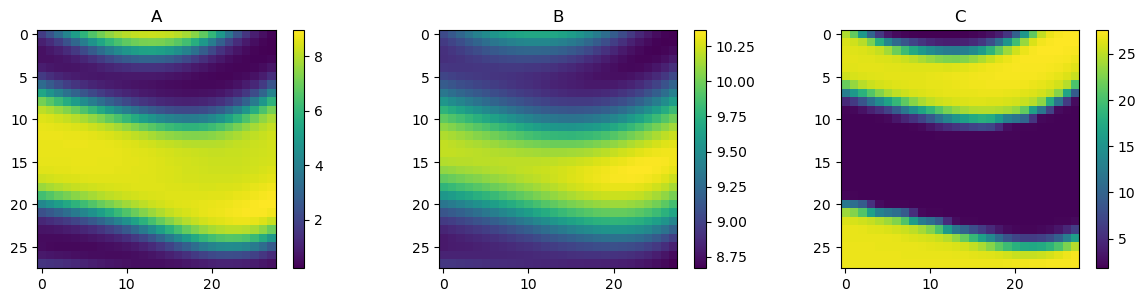

Epoch: 16000 
 data loss:0.145806, 
data A loss:0.042073, data B loss:0.007332, data C loss:0.096401, 
Laplacian A loss:0.139767, Laplacian B loss:0.187897
Physics loss:0.979118
Negative loss:0.000000

 b_A=-0.0723, b_B=-0.0138, b_C=1.1338, V_A=16.9060, V_B=19.6553, V_C=43.1869, mu_A=0.8497, mu_B=0.9590, K_AA=5.0014, K_AB=5.3291, K_AC=5.2278, K_BA=10.0990, K_BC=7.0368, K_CB=8.2297, K_CC=7.2078


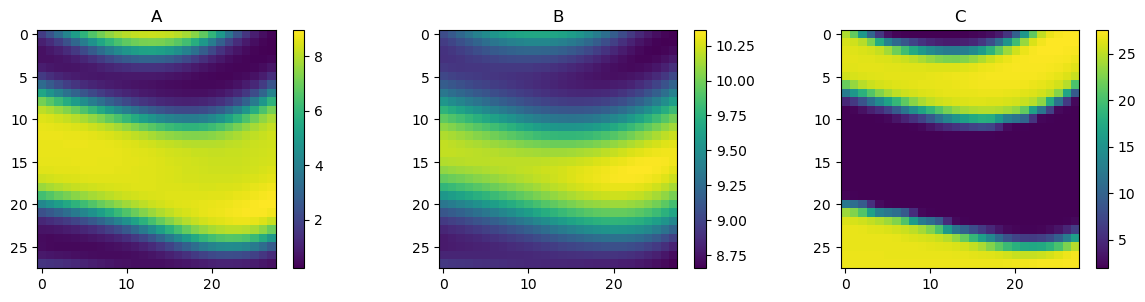

Epoch: 17000 
 data loss:0.128363, 
data A loss:0.041839, data B loss:0.007164, data C loss:0.079361, 
Laplacian A loss:0.244356, Laplacian B loss:0.141708
Physics loss:0.978681
Negative loss:0.000000

 b_A=-0.0854, b_B=-0.0301, b_C=1.1207, V_A=16.8986, V_B=19.7307, V_C=43.9123, mu_A=0.8598, mu_B=0.9709, K_AA=5.0115, K_AB=5.3766, K_AC=5.2238, K_BA=10.0849, K_BC=6.9831, K_CB=8.3540, K_CC=7.2293


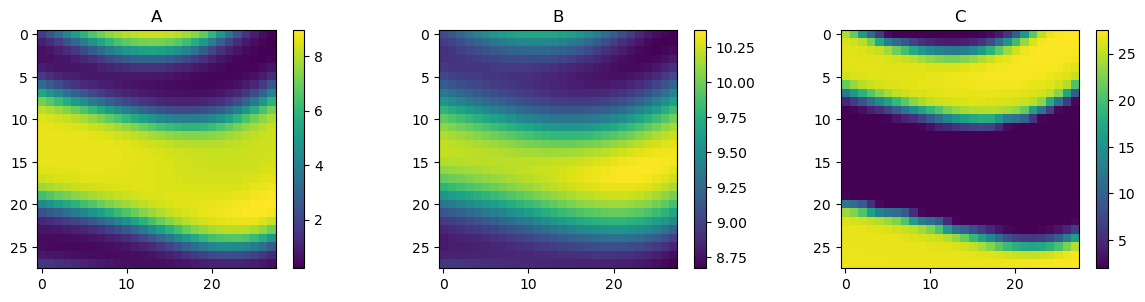

Epoch: 18000 
 data loss:0.113350, 
data A loss:0.041623, data B loss:0.004291, data C loss:0.067436, 
Laplacian A loss:0.136833, Laplacian B loss:0.112959
Physics loss:0.973141
Negative loss:0.000000

 b_A=-0.0790, b_B=-0.0239, b_C=1.1258, V_A=16.9269, V_B=19.7477, V_C=44.5041, mu_A=0.8560, mu_B=0.9662, K_AA=5.0078, K_AB=5.3765, K_AC=5.2284, K_BA=10.0852, K_BC=6.9576, K_CB=8.3815, K_CC=7.1982


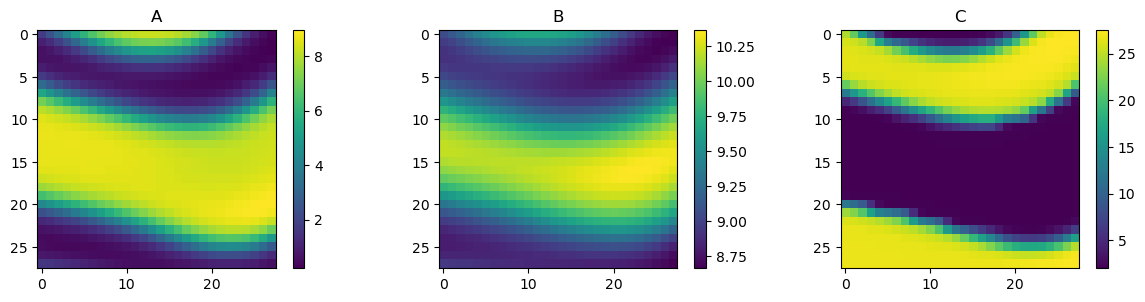

Epoch: 19000 
 data loss:0.107741, 
data A loss:0.041475, data B loss:0.008218, data C loss:0.058048, 
Laplacian A loss:0.126474, Laplacian B loss:0.101300
Physics loss:0.978116
Negative loss:0.000000

 b_A=-0.0914, b_B=-0.0404, b_C=1.1165, V_A=16.9285, V_B=19.7337, V_C=45.0191, mu_A=0.8660, mu_B=0.9751, K_AA=5.0185, K_AB=5.3830, K_AC=5.2202, K_BA=10.0710, K_BC=6.9202, K_CB=8.3701, K_CC=7.1936


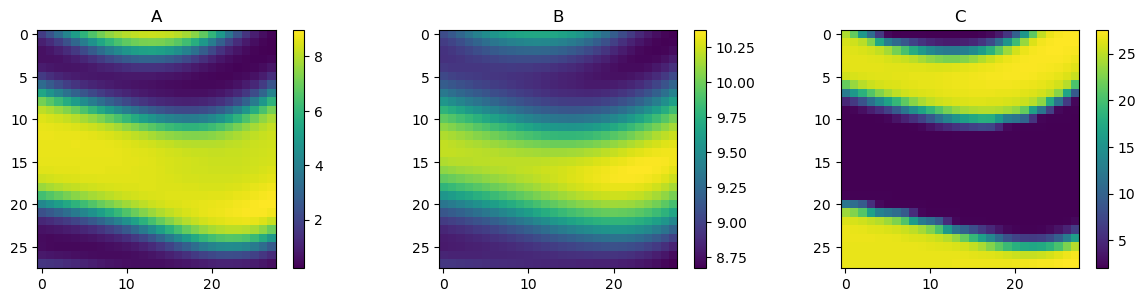

Epoch: 20000 
 data loss:0.098663, 
data A loss:0.041332, data B loss:0.004206, data C loss:0.053125, 
Laplacian A loss:0.122870, Laplacian B loss:0.084088
Physics loss:0.967419
Negative loss:0.000000

 b_A=-0.0827, b_B=-0.0318, b_C=1.1215, V_A=16.9364, V_B=19.7333, V_C=45.5072, mu_A=0.8587, mu_B=0.9712, K_AA=5.0116, K_AB=5.3759, K_AC=5.2247, K_BA=10.0756, K_BC=6.9005, K_CB=8.3812, K_CC=7.1900


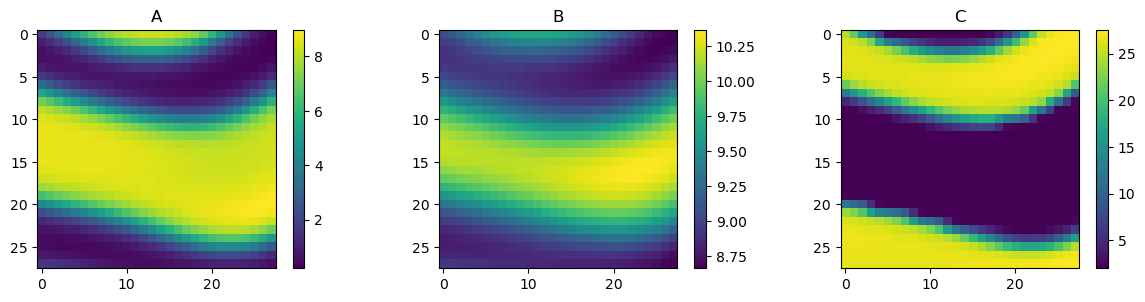

Epoch: 21000 
 data loss:0.085081, 
data A loss:0.041207, data B loss:0.003876, data C loss:0.039998, 
Laplacian A loss:0.119512, Laplacian B loss:0.072786
Physics loss:0.962298
Negative loss:0.000000

 b_A=-0.0797, b_B=-0.0232, b_C=1.1248, V_A=16.9537, V_B=19.7382, V_C=45.9684, mu_A=0.8559, mu_B=0.9667, K_AA=5.0085, K_AB=5.3696, K_AC=5.2300, K_BA=10.0764, K_BC=6.8814, K_CB=8.3948, K_CC=7.1789


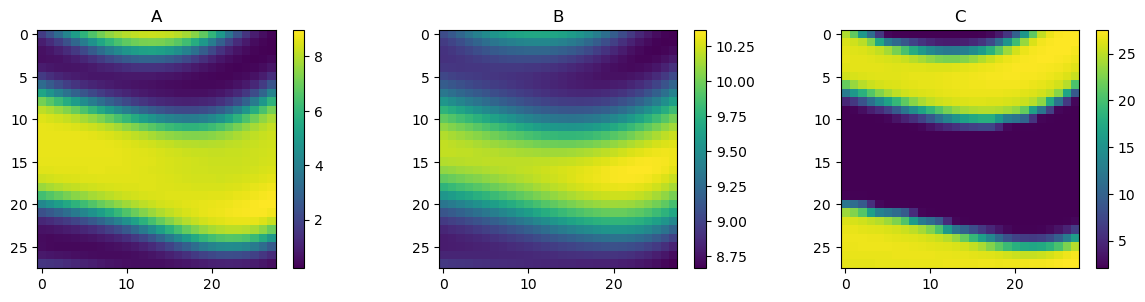

Epoch: 22000 
 data loss:0.075639, 
data A loss:0.041094, data B loss:0.004164, data C loss:0.030382, 
Laplacian A loss:0.116791, Laplacian B loss:0.066729
Physics loss:0.960474
Negative loss:0.000000

 b_A=-0.0777, b_B=-0.0205, b_C=1.1262, V_A=16.9676, V_B=19.7391, V_C=46.4139, mu_A=0.8537, mu_B=0.9650, K_AA=5.0069, K_AB=5.3666, K_AC=5.2309, K_BA=10.0743, K_BC=6.8610, K_CB=8.4003, K_CC=7.1697


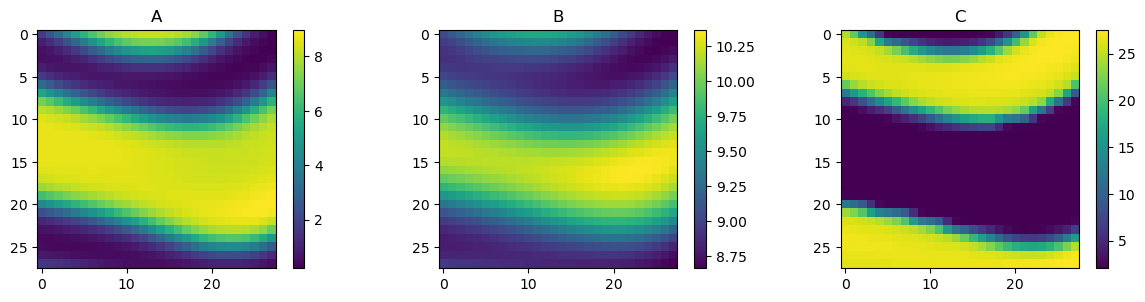

Epoch: 23000 
 data loss:0.069933, 
data A loss:0.040994, data B loss:0.003571, data C loss:0.025368, 
Laplacian A loss:0.113712, Laplacian B loss:0.062324
Physics loss:0.957889
Negative loss:0.000000

 b_A=-0.0795, b_B=-0.0246, b_C=1.1238, V_A=16.9720, V_B=19.7382, V_C=46.8164, mu_A=0.8555, mu_B=0.9673, K_AA=5.0089, K_AB=5.3686, K_AC=5.2290, K_BA=10.0709, K_BC=6.8389, K_CB=8.4011, K_CC=7.1688


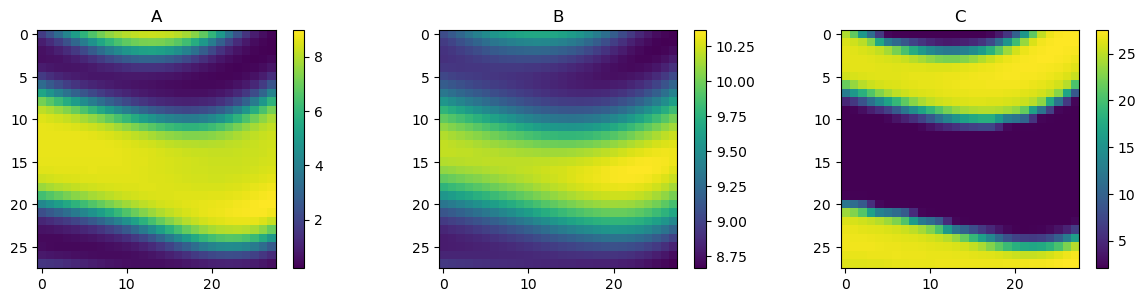

Epoch: 24000 
 data loss:0.065651, 
data A loss:0.041659, data B loss:0.003416, data C loss:0.020575, 
Laplacian A loss:0.390799, Laplacian B loss:0.058922
Physics loss:0.956286
Negative loss:0.000000

 b_A=-0.0807, b_B=-0.0250, b_C=1.1245, V_A=16.9770, V_B=19.7393, V_C=47.1820, mu_A=0.8564, mu_B=0.9674, K_AA=5.0103, K_AB=5.3688, K_AC=5.2316, K_BA=10.0677, K_BC=6.8219, K_CB=8.4039, K_CC=7.1651


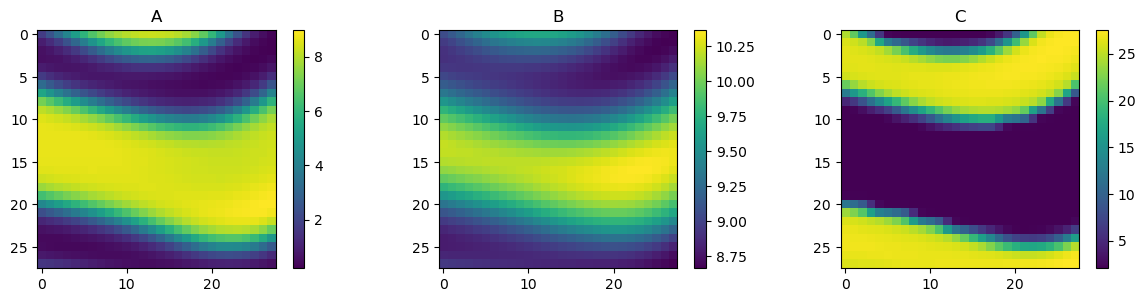

Epoch: 25000 
 data loss:0.063404, 
data A loss:0.040804, data B loss:0.003513, data C loss:0.019086, 
Laplacian A loss:0.110351, Laplacian B loss:0.056488
Physics loss:0.956701
Negative loss:0.000000

 b_A=-0.0815, b_B=-0.0289, b_C=1.1215, V_A=16.9768, V_B=19.7380, V_C=47.5153, mu_A=0.8568, mu_B=0.9696, K_AA=5.0110, K_AB=5.3712, K_AC=5.2286, K_BA=10.0661, K_BC=6.8029, K_CB=8.4038, K_CC=7.1683


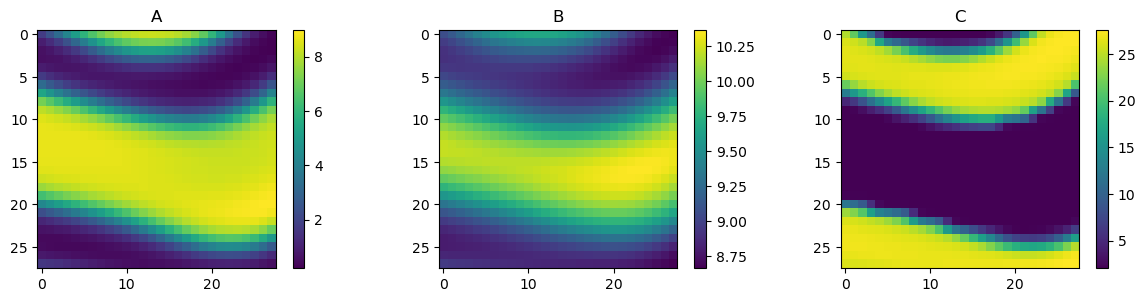

Epoch: 26000 
 data loss:0.063429, 
data A loss:0.040721, data B loss:0.003237, data C loss:0.019471, 
Laplacian A loss:0.106537, Laplacian B loss:0.053744
Physics loss:0.954872
Negative loss:0.000000

 b_A=-0.0791, b_B=-0.0228, b_C=1.1240, V_A=16.9778, V_B=19.7438, V_C=47.8114, mu_A=0.8554, mu_B=0.9665, K_AA=5.0094, K_AB=5.3689, K_AC=5.2316, K_BA=10.0681, K_BC=6.7915, K_CB=8.4091, K_CC=7.1607


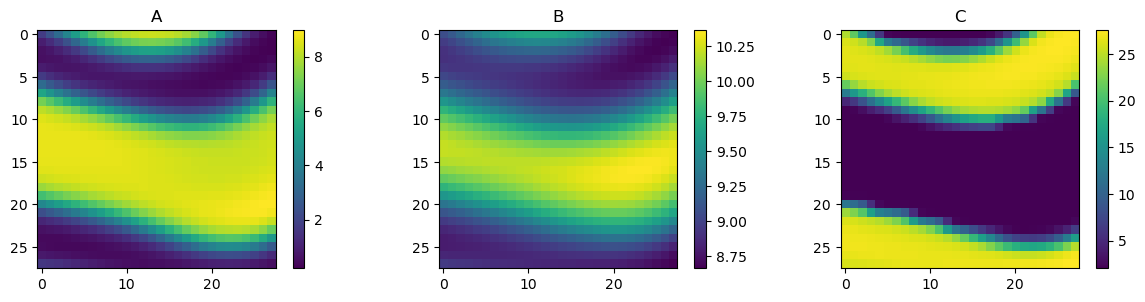

Epoch: 27000 
 data loss:0.061953, 
data A loss:0.040637, data B loss:0.003636, data C loss:0.017680, 
Laplacian A loss:0.104448, Laplacian B loss:0.052688
Physics loss:0.955676
Negative loss:0.000000

 b_A=-0.0813, b_B=-0.0294, b_C=1.1209, V_A=16.9798, V_B=19.7408, V_C=48.0770, mu_A=0.8565, mu_B=0.9702, K_AA=5.0110, K_AB=5.3728, K_AC=5.2283, K_BA=10.0647, K_BC=6.7756, K_CB=8.4068, K_CC=7.1628


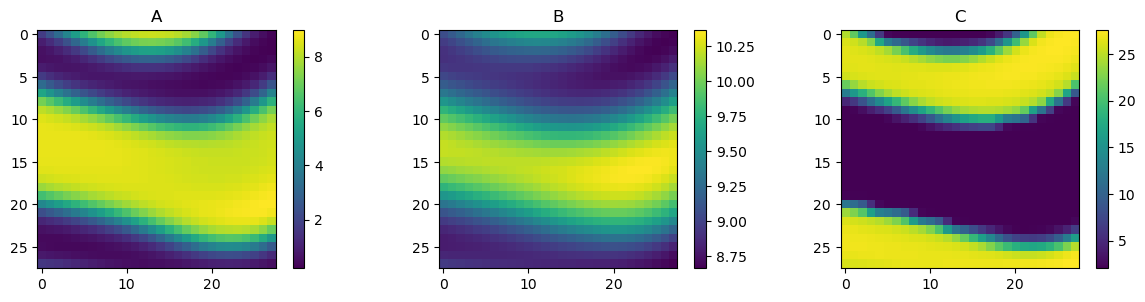

Epoch: 28000 
 data loss:0.056224, 
data A loss:0.040558, data B loss:0.003095, data C loss:0.012571, 
Laplacian A loss:0.104844, Laplacian B loss:0.050265
Physics loss:0.953848
Negative loss:0.000000

 b_A=-0.0786, b_B=-0.0224, b_C=1.1237, V_A=16.9840, V_B=19.7460, V_C=48.3133, mu_A=0.8547, mu_B=0.9664, K_AA=5.0091, K_AB=5.3697, K_AC=5.2313, K_BA=10.0664, K_BC=6.7680, K_CB=8.4115, K_CC=7.1517


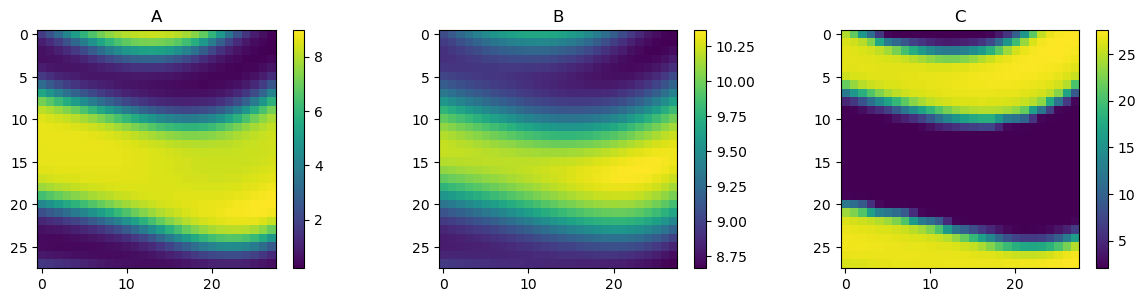

Epoch: 29000 
 data loss:0.055106, 
data A loss:0.040494, data B loss:0.003068, data C loss:0.011545, 
Laplacian A loss:0.271205, Laplacian B loss:0.049079
Physics loss:0.953594
Negative loss:0.000000

 b_A=-0.0808, b_B=-0.0267, b_C=1.1231, V_A=16.9837, V_B=19.7442, V_C=48.5231, mu_A=0.8562, mu_B=0.9682, K_AA=5.0109, K_AB=5.3718, K_AC=5.2315, K_BA=10.0642, K_BC=6.7575, K_CB=8.4094, K_CC=7.1523


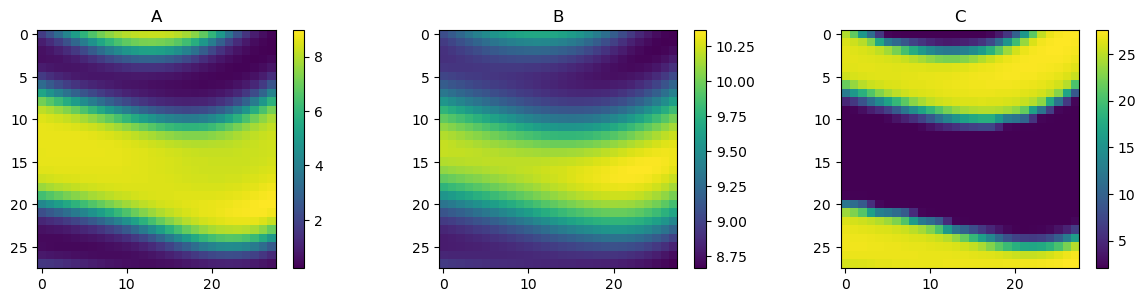

Epoch: 30000 
 data loss:0.054281, 
data A loss:0.040419, data B loss:0.003118, data C loss:0.010745, 
Laplacian A loss:0.099481, Laplacian B loss:0.047673
Physics loss:0.952995
Negative loss:0.000000

 b_A=-0.0787, b_B=-0.0220, b_C=1.1242, V_A=16.9899, V_B=19.7483, V_C=48.7180, mu_A=0.8543, mu_B=0.9658, K_AA=5.0091, K_AB=5.3696, K_AC=5.2318, K_BA=10.0644, K_BC=6.7499, K_CB=8.4120, K_CC=7.1452


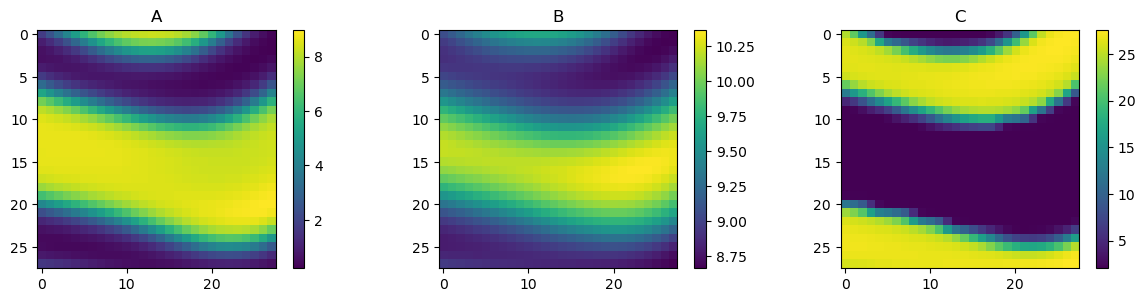

    Early dtoped at 30384
Epoch: 30384 
 data loss:0.064774, 
data A loss:0.040384, data B loss:0.003192, data C loss:0.021199, 
Laplacian A loss:0.098113, Laplacian B loss:0.048003
Physics loss:0.951588
Negative loss:0.000000

 b_A=-0.0817, b_B=-0.0234, b_C=1.1222, V_A=16.9781, V_B=19.7440, V_C=48.7710, mu_A=0.8576, mu_B=0.9673, K_AA=5.0129, K_AB=5.3698, K_AC=5.2317, K_BA=10.0611, K_BC=6.7453, K_CB=8.4086, K_CC=7.1493


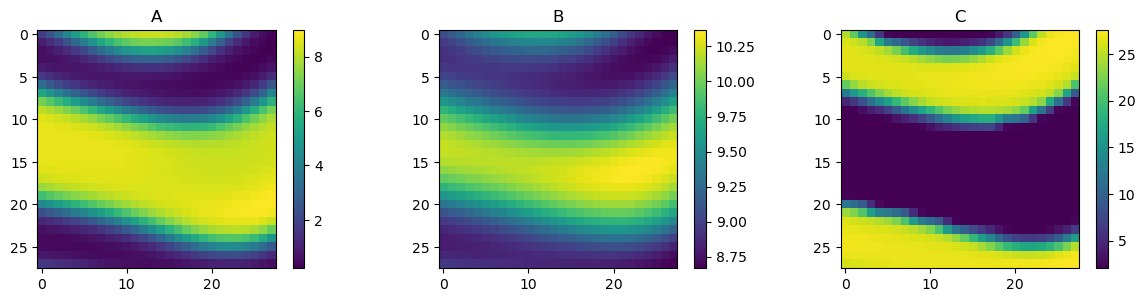

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 30000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - mu_B * B        
        F_C =  b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%1000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.04038486077845593 B RMSE:0.0036977257493621745 C RMSE:0.02286869513843521
F_A actual:1.0095155490128616, F_A:1.0149633884429932, RMSE: 0.023868034618724755
F_B actual:62.442119031793936, F_B:62.372032165527344, RMSE: 0.03493023722374173
F_C actual:0.2455968280438346, F_C:0.24067243933677673, RMSE: 0.0359565856177884

Laplacian A RMSE: 0.09811349716235752
Laplacian B RMSE: 0.047633646291791544

dAdt RMSE: 0.02375546459371129
dBdt RMSE: 0.05460543370975399
dCdt RMSE: 0.0359565856177884


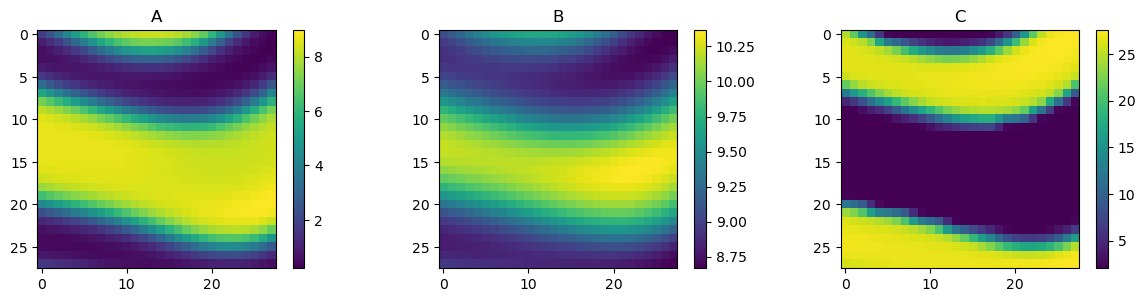

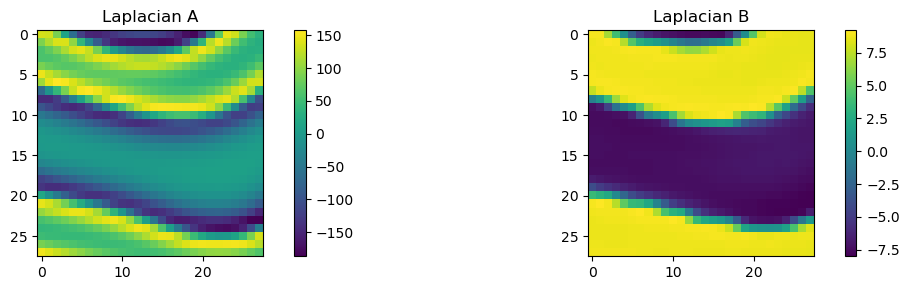

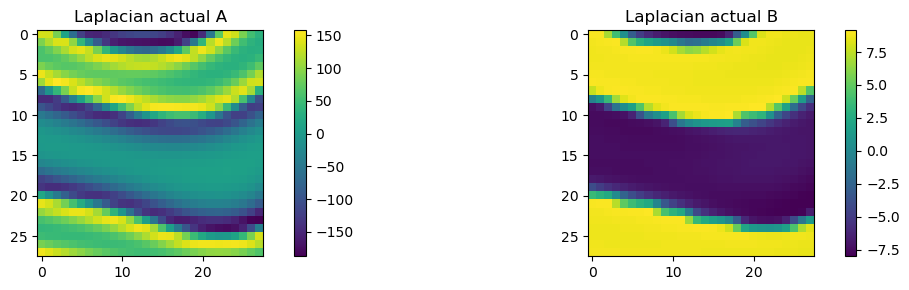

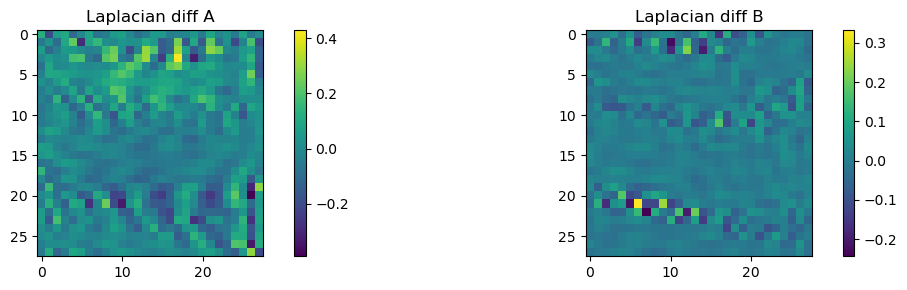

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

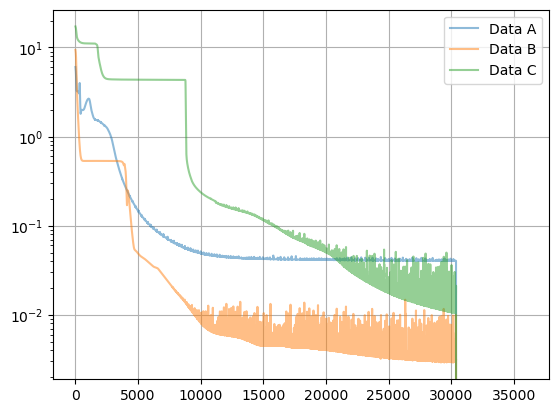

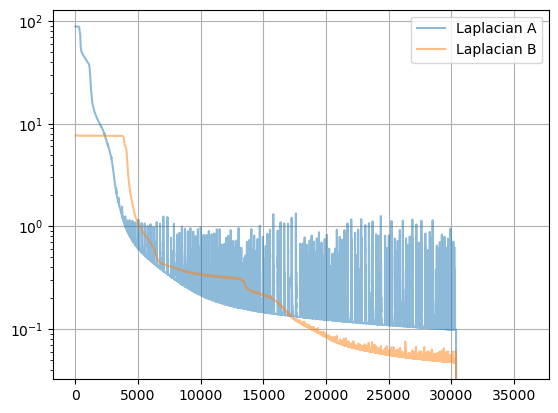

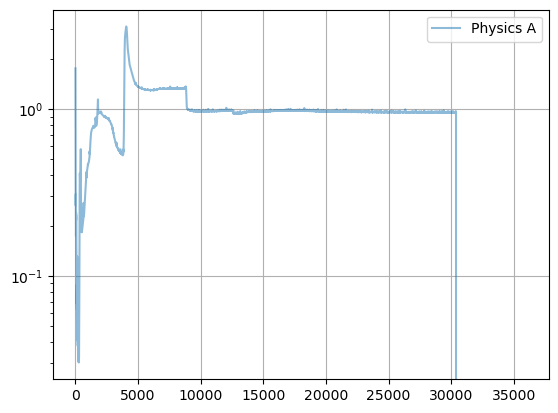

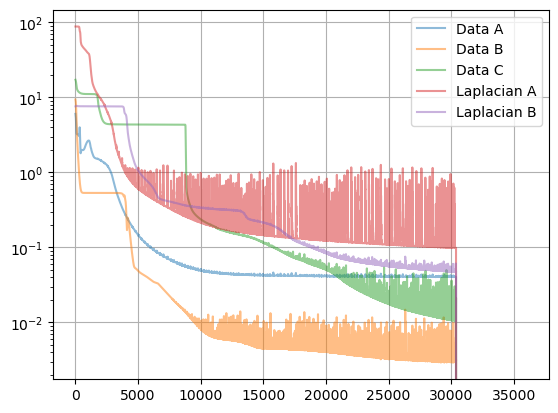

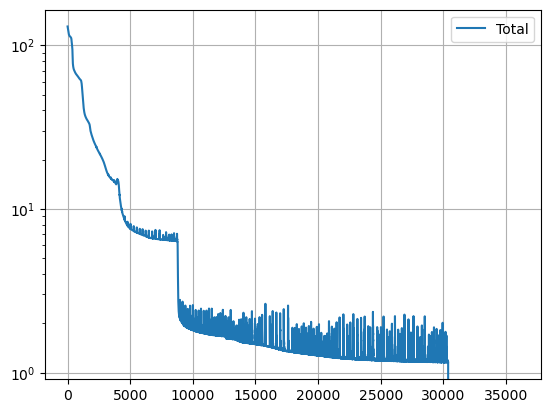

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

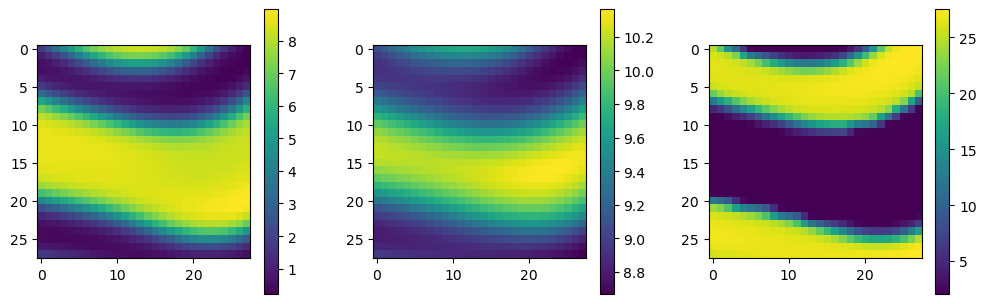

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.04038486077845593
0.0036977257493621745
0.02286869513843521


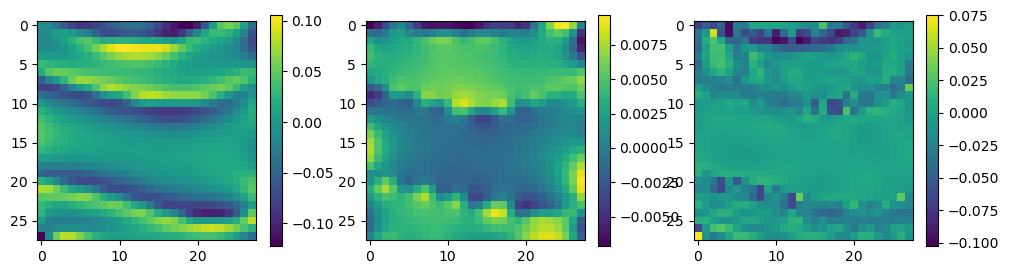

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [11]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [12]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	0.100		0.000		nan		(nan,nan)
b_C:	1.000		1.122		nan		(nan,nan)
V_A:	20.000		16.978		nan		(nan,nan)
V_B:	20.000		19.744		nan		(nan,nan)
V_C:	20.000		48.771		nan		(nan,nan)
mu_A:	1.000		0.858		nan		(nan,nan)
mu_B:	1.000		0.967		nan		(nan,nan)
K_AA:	5.000		5.013		0.010		(0.010,36.246)
K_AB:	5.000		5.370		0.010		(0.010,36.246)
K_AC:	5.000		5.232		0.010		(0.010,36.246)
K_BA:	10.000		10.061		2.184		(2.184,40.446)
K_BC:	10.000		6.745		2.184		(2.184,40.446)
K_CB:	5.000		8.409		0.543		(0.543,110.700)
K_CC:	5.000		7.149		0.543		(0.543,110.700)


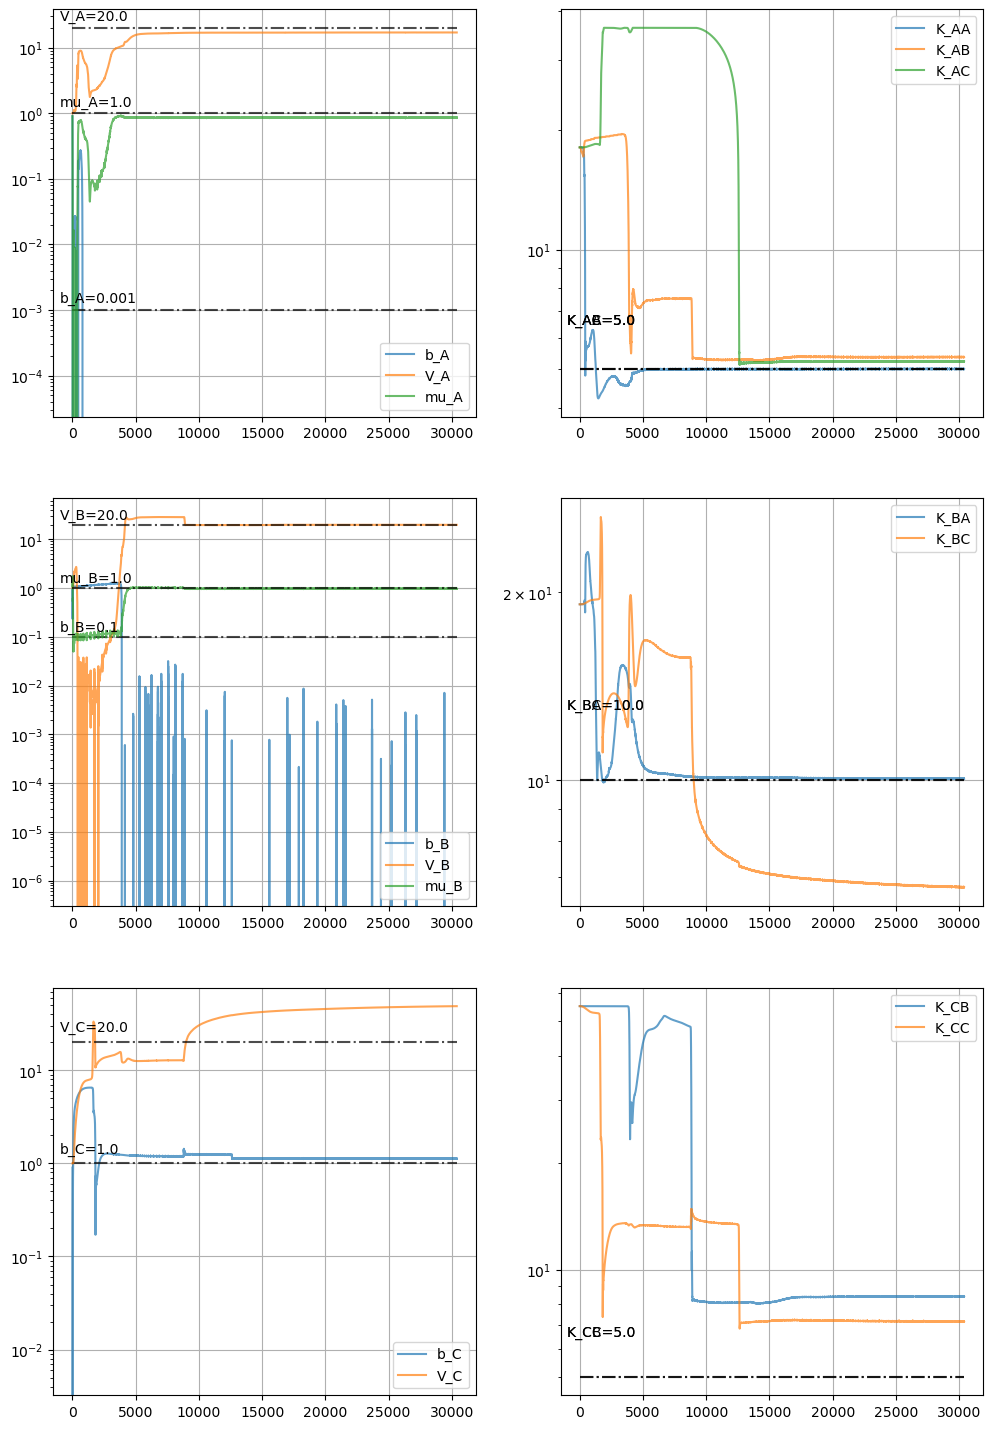

In [18]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [17]:
import pickle

torch.save(model, "./06_outputs/model_PINN_24")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_24")
with open('./06_outputs/model_PINN_params_name_list_24.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_24.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_24.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)
with open(f"./06_outputs/model_PINN_estimated_params_list_24.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)     

In [14]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

/end/home/rh2310/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


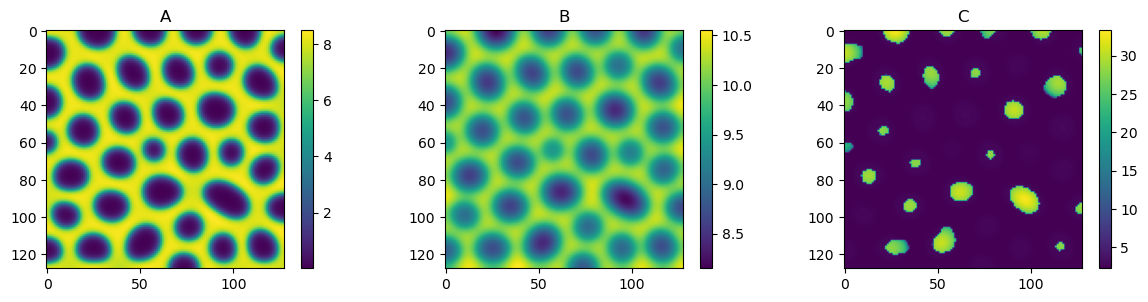

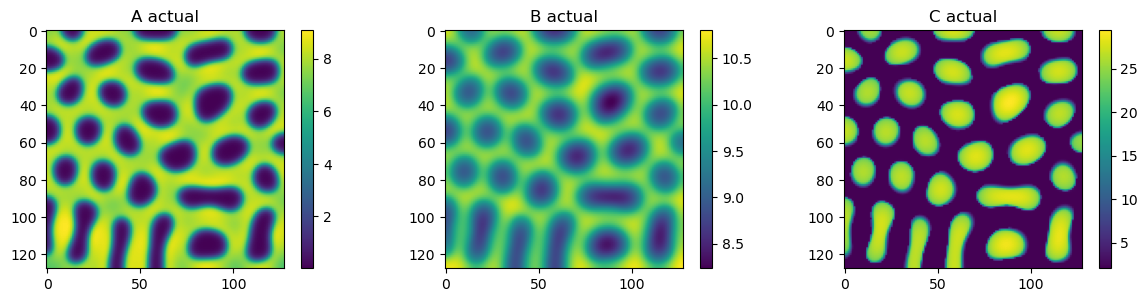

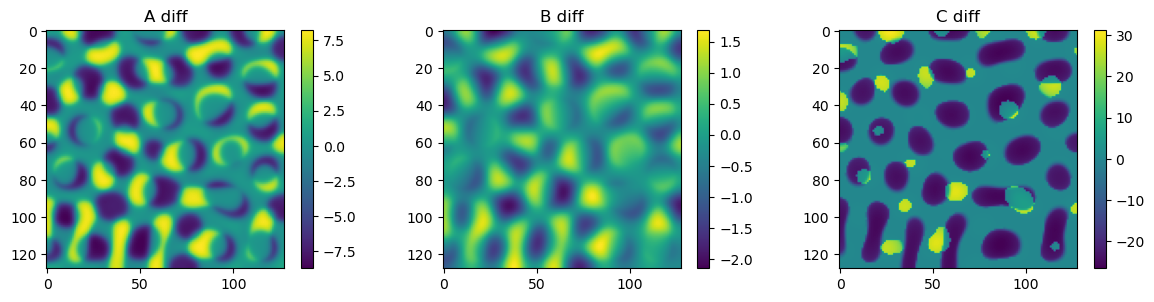

In [15]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [16]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}